# Hotel Analysis

## Table of Content

### Importing Libraries and Data

### Merging Datasets

### Changes in Average Daily Rate

### Calculate Average and Median Stay

### Calculate Cancellation Rate

### Analysis of Market Segment and Distribution Channel

### Guest Origin Analysis

### Export Data

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define path

path = '/Users/henning/Portfolio/Hotel_Booking'

In [3]:
# Import data of Resort Hotel

h1 = pd.read_csv(os.path.join(path, 'Data', 'h1.csv'))

In [4]:
# Import data of City Hotel

h2 = pd.read_csv(os.path.join(path, 'Data', 'h2.csv'))

## Merging Datasets

In [5]:
# Combine datasets with an identifier
h1['Hotel'] = 'Resort Hotel'
h2['Hotel'] = 'City Hotel'
combined_df = pd.concat([h1, h2])

## Changes in Average Daily Rate

In [6]:
# Convert date to a datetime object for plotting
combined_df['ArrivalDate'] = pd.to_datetime(combined_df['ArrivalDateYear'].astype(str) + '-' +
                                            combined_df['ArrivalDateMonth'] + '-' +
                                            combined_df['ArrivalDateDayOfMonth'].astype(str))

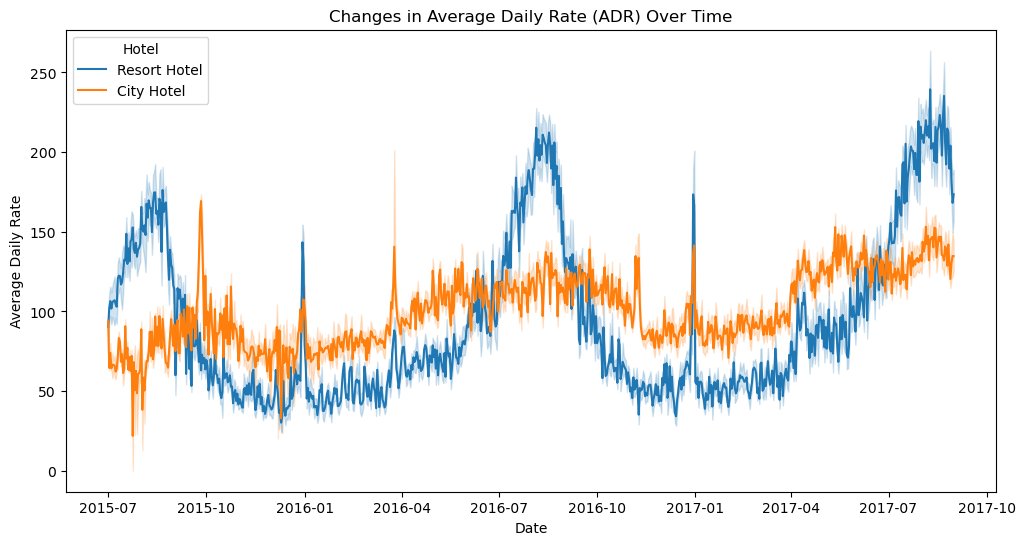

In [7]:
# Plotting ADR changes over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='ArrivalDate', y='ADR', hue='Hotel')
plt.title('Changes in Average Daily Rate (ADR) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate')
plt.show()

## Calculate Average and Median Stay

In [8]:
# Calculate total stay length
h1['TotalStay'] = h1['StaysInWeekendNights'] + h1['StaysInWeekNights']
h2['TotalStay'] = h2['StaysInWeekendNights'] + h2['StaysInWeekNights']

# Calculate average and median stay for each hotel
avg_stay_hotel1 = h1['TotalStay'].mean()
median_stay_hotel1 = h1['TotalStay'].median()
avg_stay_hotel2 = h2['TotalStay'].mean()
median_stay_hotel2 = h2['TotalStay'].median()

print(f"Hotel 1 - Average Stay: {avg_stay_hotel1}, Median Stay: {median_stay_hotel1}")
print(f"Hotel 2 - Average Stay: {avg_stay_hotel2}, Median Stay: {median_stay_hotel2}")

Hotel 1 - Average Stay: 4.318547179231153, Median Stay: 3.0
Hotel 2 - Average Stay: 2.978141938736922, Median Stay: 3.0


## Calculate Cancellation Rate

In [9]:
# Calculate cancellation rate for each hotel
cancel_rate_hotel1 = h1['IsCanceled'].mean()
cancel_rate_hotel2 = h2['IsCanceled'].mean()

print(f"Cancellation Rate for Resort Hotel: {cancel_rate_hotel1:.2%}")
print(f"Cancellation Rate for City Hotel: {cancel_rate_hotel2:.2%}")

Cancellation Rate for Resort Hotel: 27.76%
Cancellation Rate for City Hotel: 41.73%


## Analysis of Market Segment and Distribution Channel

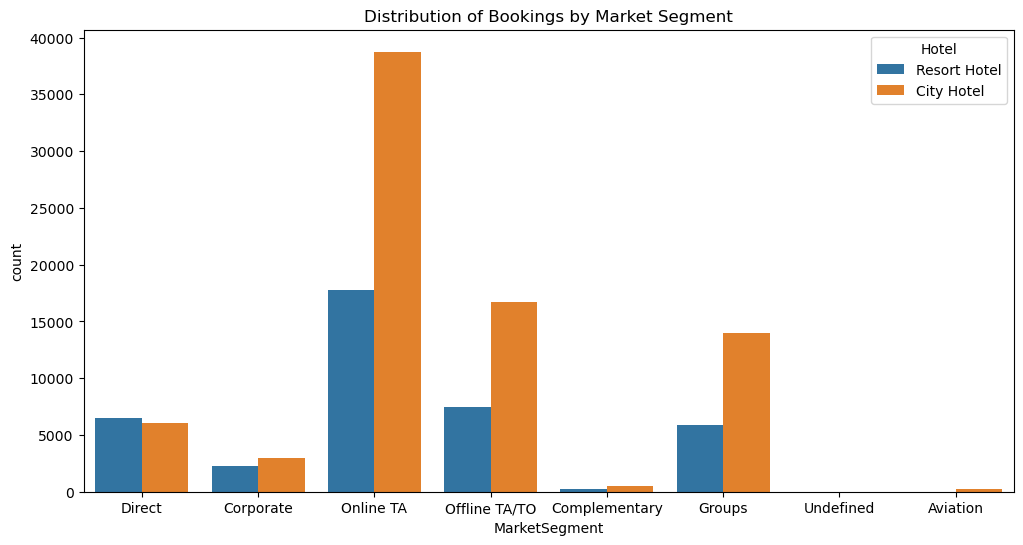

In [10]:
# Plot distribution of market segment for each hotel
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='MarketSegment', hue='Hotel')
plt.title('Distribution of Bookings by Market Segment')
plt.show()

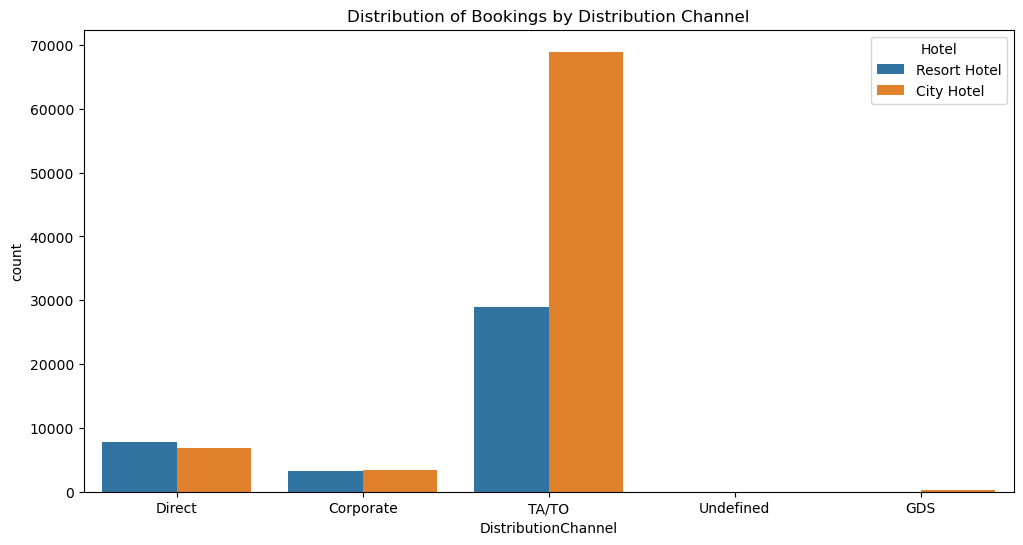

In [11]:
# Plot distribution of distribution channel for each hotel
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='DistributionChannel', hue='Hotel')
plt.title('Distribution of Bookings by Distribution Channel')
plt.show()

## Guest Origin Analysis

In [12]:
# Top 5 countries for each hotel
top_countries_hotel1 = h1['Country'].value_counts().head(5)
top_countries_hotel2 = h2['Country'].value_counts().head(5)

print("Top 5 Countries for Resort Hotel:\n", top_countries_hotel1)
print("Top 5 Countries for City Hotel:\n", top_countries_hotel2)

Top 5 Countries for Resort Hotel:
 Country
PRT    17630
GBR     6814
ESP     3957
IRL     2166
FRA     1611
Name: count, dtype: int64
Top 5 Countries for City Hotel:
 Country
PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
Name: count, dtype: int64


## Export Data

In [13]:
combined_df.to_csv(os.path.join(path, 'Data', 'merged_hotel.csv'))